UNIVARIATE TIME SERIES ANALYSIS USING LSTM

IMPORTING NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING THE DATASET

In [ ]:
dateparse= lambda dates: pd.datetime.strptime(dates,'%d-%m-%Y')
data=pd.read_csv('MAster_methanol.csv',parse_dates=['Date'],date_parser=dateparse,usecols=['Date','India Price'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
#data.dtypes
data.index=pd.to_datetime(data['Date'],format='%d-%m-%Y')

In [ ]:
data.head()

,Date,India Price
Date,,
2005-10-07,2005-10-07,240.0
2005-10-14,2005-10-14,240.0
2005-10-21,2005-10-21,242.5
2005-10-28,2005-10-28,242.5
2005-11-04,2005-11-04,250.0


In [ ]:
del data['Date']

In [ ]:
data.head()

,India Price
Date,
2005-10-07,240.0
2005-10-14,240.0
2005-10-21,242.5
2005-10-28,242.5
2005-11-04,250.0


In [ ]:
data.index

DatetimeIndex(['2005-10-07', '2005-10-14', '2005-10-21', '2005-10-28',
               '2005-11-04', '2005-11-11', '2005-11-18', '2005-11-25',
               '2005-12-02', '2005-12-09',
               ...
               '2021-02-19', '2021-02-26', '2021-03-05', '2021-03-12',
               '2021-03-19', '2021-03-26', '2021-04-02', '2021-04-09',
               '2021-04-16', '2021-04-23'],
              dtype='datetime64[ns]', name='Date', length=796, freq=None)

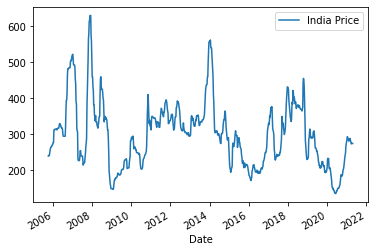

In [ ]:
data.plot()

SPLITTING DATA INTO TRAIN AND TEST SET

In [ ]:
train=data[:670]

In [ ]:
test=data[670:]

In [ ]:
len(train),len(test)

(670, 126)

FEATURE SCALING OF DATA

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# to convert data between scale of 0 to 1

In [ ]:
data.head(),data.tail()

(            India Price
 Date                   
 2005-10-07        240.0
 2005-10-14        240.0
 2005-10-21        242.5
 2005-10-28        242.5
 2005-11-04        250.0,             India Price
 Date                   
 2021-03-26        274.0
 2021-04-02        274.0
 2021-04-09        276.0
 2021-04-16        275.0
 2021-04-23        275.0)

In [ ]:
scaler.fit(train) #fit scaler object on training test #cals std ,max,min value

MinMaxScaler()

In [ ]:
#transform the train and test in scalar object values
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [ ]:
scaled_train[:10] # its an array

array([[0.19170984],
       [0.19170984],
       [0.19689119],
       [0.19689119],
       [0.21243523],
       [0.22797927],
       [0.23834197],
       [0.24352332],
       [0.24352332],
       [0.24870466]])

In [ ]:
scaled_test[:10]

array([[0.58549223],
       [0.50259067],
       [0.39896373],
       [0.28290155],
       [0.24766839],
       [0.21243523],
       [0.18756477],
       [0.17202073],
       [0.1761658 ],
       [0.17720207]])

TIME SERIES ANALYSIS USING TENSORFLOW'S TIME SERIES GENERATOR

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#define generator 
#given data is weekly 
#3 months=12 weeks data
n_input=12
n_features=1 #only 1 feature in the data
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [ ]:
X,y=generator[0]
print(f'Given the array: \n{X.flatten()}')
print(f'Predict the y: \n {y}')
#Given values of 3 months in array ie,12 weeks
#predicts 13th week's value

Given the array: 
[0.19170984 0.19170984 0.19689119 0.19689119 0.21243523 0.22797927
 0.23834197 0.24352332 0.24352332 0.24870466 0.25388601 0.25388601]
Predict the y: 
 [[0.26943005]]


A PREVIEW OF HOW PREDICTIONS ARE MADE, GIVEN 12 WEEKS DATA ,THE MODEL PREDICTS THE 13th WEEK'S DATA

In [ ]:
X,y=generator[1] #take values #from 2nd week and predict the 14th week and so on
print(f'Given the array: \n{X.flatten()}')
print(f'Predict the y: \n {y}')
#Given values of 3 months in array ie,12 weeks
#predicts 13th week's value

Given the array: 
[0.19170984 0.19689119 0.19689119 0.21243523 0.22797927 0.23834197
 0.24352332 0.24352332 0.24870466 0.25388601 0.25388601 0.26943005]
Predict the y: 
 [[0.26943005]]


In [ ]:
X.shape

(1, 12, 1)

CREATING A LSTM MODEL USING KERAS LIBRARY FROM TENSORFLOW

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
#calling models
#layers added sequential

In [ ]:
#define model
model=Sequential()

In [ ]:
#LSTM layer with 100 neurons , activation function relu and input shape of data
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1)) # model layer final
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fit model
model.fit(generator,epochs=50)

Epoch 1/50
658/658 [==============================] - 5s 6ms/step - loss: 0.0120
Epoch 2/50
658/658 [==============================] - 5s 8ms/step - loss: 0.0041
Epoch 3/50
658/658 [==============================] - 4s 5ms/step - loss: 0.0024
Epoch 4/50
658/658 [==============================] - 4s 6ms/step - loss: 0.0019
Epoch 5/50
658/658 [==============================] - 4s 5ms/step - loss: 0.0015
Epoch 6/50
658/658 [==============================] - 4s 6ms/step - loss: 0.0013
Epoch 7/50
658/658 [==============================] - 4s 5ms/step - loss: 0.0013
Epoch 8/50
658/658 [==============================] - 4s 5ms/step - loss: 0.0011
Epoch 9/50
658/658 [==============================] - 4s 5ms/step - loss: 0.0011
Epoch 10/50
658/658 [==============================] - 4s 5ms/step - loss: 0.0011
Epoch 11/50
658/658 [==============================] - 3s 5ms/step - loss: 9.6730e-04
Epoch 12/50
658/658 [==============================] - 4s 6ms/step - loss: 9.4853e-04
Epoch 13/50
658/6

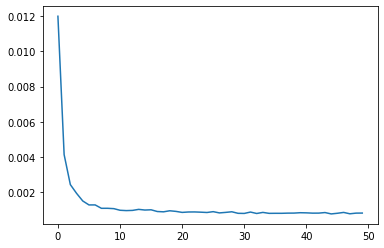

In [ ]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

AS EPOCHS BECAME CONSTANT AROUND 15,I COULD HAVE STOPPED MY EPOCHS AT 15.

FUTURE PREDICTION- FORECASTING VALUES

A PREVIEW OF HOW VALUES WILL BE PREDICTED

In [ ]:
last_train_batch= scaled_train[-12:]# last 3 months data of training test to predict the first value of test set

In [ ]:
last_train_batch

array([[0.47150259],
       [0.46735751],
       [0.4611399 ],
       [0.4611399 ],
       [0.45906736],
       [0.45906736],
       [0.4507772 ],
       [0.4611399 ],
       [0.47150259],
       [0.61761658],
       [0.63834197],
       [0.62487047]])

In [ ]:
last_train_batch=last_train_batch.reshape((1,n_input,n_features))

In [ ]:
model.predict(last_train_batch)

array([[0.6261526]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.58549223])

As we can see the predicted value (0.62) and actual scaled test value(0.58) are close , so the model is predicting good.

MAKING THE ACTUAL FUTURE PREDICTIONS

In [ ]:
test_predictions=[]

first_batch=scaled_train[-n_input:]
curr_batch=first_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
  #prediction value for first batch
  curr_pred=model.predict(curr_batch)[0]
  #append prediction into array
  test_predictions.append(curr_pred)
  curr_batch=np.append(curr_batch[:,1:,:],[[curr_pred]],axis=1)

In [ ]:
curr_pred

array([0.51144975], dtype=float32)

In [ ]:
curr_batch

array([[[0.51173598],
        [0.51169634],
        [0.51165682],
        [0.51161867],
        [0.51158291],
        [0.51155049],
        [0.51152194],
        [0.51149797],
        [0.51147872],
        [0.51146436],
        [0.51145476],
        [0.51144975]]])

In [ ]:
curr_batch

array([[[0.51173598],
        [0.51169634],
        [0.51165682],
        [0.51161867],
        [0.51158291],
        [0.51155049],
        [0.51152194],
        [0.51149797],
        [0.51147872],
        [0.51146436],
        [0.51145476],
        [0.51144975]]])

In [ ]:
curr_batch.shape

(1, 12, 1)

In [ ]:
curr_pred

array([0.51144975], dtype=float32)

In [ ]:
test_predictions

[array([0.6261526], dtype=float32),
 array([0.614121], dtype=float32),
 array([0.6066302], dtype=float32),
 array([0.5971043], dtype=float32),
 array([0.58640873], dtype=float32),
 array([0.5745357], dtype=float32),
 array([0.5619681], dtype=float32),
 array([0.54907614], dtype=float32),
 array([0.5363306], dtype=float32),
 array([0.523056], dtype=float32),
 array([0.51039], dtype=float32),
 array([0.49878523], dtype=float32),
 array([0.48863283], dtype=float32),
 array([0.48029652], dtype=float32),
 array([0.47387484], dtype=float32),
 array([0.4693512], dtype=float32),
 array([0.46666515], dtype=float32),
 array([0.46567285], dtype=float32),
 array([0.466219], dtype=float32),
 array([0.46811295], dtype=float32),
 array([0.47114828], dtype=float32),
 array([0.4751017], dtype=float32),
 array([0.47975367], dtype=float32),
 array([0.48488685], dtype=float32),
 array([0.49029368], dtype=float32),
 array([0.49578375], dtype=float32),
 array([0.5011866], dtype=float32),
 array([0.50635064]

In [ ]:
test.head()

,India Price
Date,
2018-11-02,430.0
2018-11-09,390.0
2018-11-16,340.0
2018-11-23,284.0
2018-11-30,267.0


SCALING VALUES BACK TO ORIGINAL UNITS

In [ ]:
true_predictions=scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions']=true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ACTUAL VALUES VS PREDICTED VALUES OF INDIA PRICE

In [ ]:
test.head()

,India Price,Predictions
Date,,
2018-11-02,430.0,449.618617
2018-11-09,390.0,443.813392
2018-11-16,340.0,440.199074
2018-11-23,284.0,435.602830
2018-11-30,267.0,430.442214


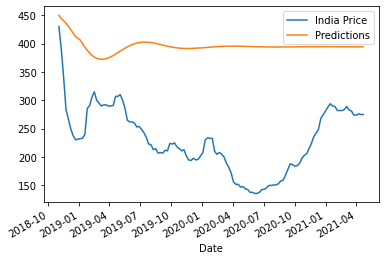

In [ ]:
test.plot()

CALCULATING ROOT MEAN SQUARE ERROR

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
error=sqrt(mean_squared_error(test['India Price'],test['Predictions']))

In [ ]:
print(error)

175.50902517918877
